# Visualize Reconstructed Images

In [10]:
import matplotlib.pyplot as plt
import torch
from vqvae import PROJECT_ROOT
from vqvae.data.celeba import CelebADataModule
from vqvae.data.cifar10 import CIFAR10DataModule
from vqvae.modules import VQVAE
from vqvae.utils.visualization import show

## CIFAR-10

In [2]:
cifar_ckpt = {
    "baseline": "logs/cifar10/lightning_logs/cifar10_baseline/checkpoints/epoch=27-step=10948.ckpt",
    "without_ema": "logs/cifar10/lightning_logs/cifar10_wo_ema/checkpoints/epoch=21-step=4312.ckpt",
}

In [3]:
cifar_models = {
    k: VQVAE.load_from_checkpoint(PROJECT_ROOT / v) for k, v in cifar_ckpt.items()
}

In [4]:
cifar_dm = CIFAR10DataModule(val_batch_size=16)
cifar_dm.prepare_data()
cifar_dm.setup("test")
cifar_dl = cifar_dm.test_dataloader()

Files already downloaded and verified


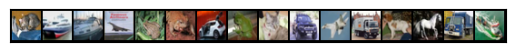

In [8]:
cifar_x = next(iter(cifar_dl))[0]
show(cifar_x, nrow=16)

In [12]:
with torch.no_grad():
    cifar_reconstructions = [cifar_x]
    cifar_reconstructions += [
        model(cifar_x.to(model.device))[0].cpu() for model in cifar_models.values()
    ]

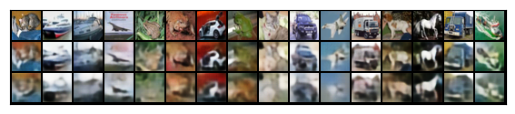

In [19]:
show(torch.cat(cifar_reconstructions), nrow=16)
(PROJECT_ROOT / "figures" / "reconstruction").mkdir(parents=True, exist_ok=True)
plt.savefig(PROJECT_ROOT / "figures" / "reconstruction" / "cifar10.png", dpi=275)

## CelebA

In [ ]:
celeba_ckpt = {
    "baseline": "logs/celeba/lightning_logs/celeba_baseline/checkpoints/epoch=27-step=10948.ckpt",
    "latent_256": "logs/celeba/lightning_logs/celeba_latent_256/checkpoints/epoch=45-step=58512.ckpt",
    "without_ema": "logs/celeba/lightning_logs/celeba_wo_ema/checkpoints/epoch=45-step=58512.ckpt",
}

In [ ]:
celeba_models = {k: VQVAE.load_from_checkpoint(v) for k, v in celeba_ckpt.items()}

In [ ]:
celeba_dm = CelebADataModule(val_batch_size=8)
celeba_dm.prepare_data()
celeba_dm.setup("test")
celeba_dl = celeba_dm.test_dataloader()

In [ ]:
celeba_x = next(iter(celeba_dl))[0]
show(celeba_x, nrow=8)

In [ ]:
with torch.no_grad():
    celeba_reconstructions = [celeba_x]
    celeba_reconstructions += [
        model(celeba_x.to(model.device))[0].cpu() for model in celeba_models.values()
    ]

In [ ]:
show(torch.cat(celeba_reconstructions), nrow=8)
plt.savefig(PROJECT_ROOT / "figures" / "reconstruction" / "celeba.png", dpi=275)